#  Выявление закономерностей, определяющих успешность компьютерной игры

Необходимо выявить определяющие успешность игры закономерности для интернет-магазина «Стримчик», продающего компьютерные игры по всему миру. 

Провести анализ, основываясь на данных из открытых источников, которые содержат исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Анализ проводится с целью планирования рекламных кампаний, он позволит сделать ставку на потенциально популярный продукт.

### План

1. Изучение общей информации о данных


2. Подготовка данных
  - Замена названий столбцов (приведение к нижнему регистру);
  - Преобразование данных в нужные типы. Описание столбцов и причин замены;
  - Обработка пропусков:
    - причины заполнения / незаполнения;
    - описание причин, которые могли привести к пропускам;
    - разбор значений с аббревиатурой 'tbd' в столбцах с рейтингом. Описание обработки;
    - подсчет суммарных продаж во всех регионах, запись в отдельный столбец.
    
    
3. Исследовательский анализ данных
  - анализ выпуска игр в разные годы. Важны ли данные за все периоды?
  - анализ изменения продаж по платформам. Выбор платформы с наибольшими суммарными продажами и построение распределений по годам. За какой характерный срок появляются новые и исчезают старые платформы?
  - Определение актуального периода.
  - Какие платформы лидируют по продажам, растут или падают? Выбор потенциально прибыльных платформ.
  - Построение графика «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Велика ли разница в продажах, в средних продажах на разных платформах?
  - анализ влияния на продажи внутри одной популярной платформы отзывов пользователей и критиков. Построение диаграммы рассеяния и подсчет корреляции между отзывами и продажами. Выводы. 
  - сравнение выводов с продажами игр на других платформах.
  - анализ общего распределения игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?
  
  
4. Портрет пользователя каждого региона
  - Определение для пользователя каждого региона (NA, EU, JP):
      - Самые популярные платформы (топ-5). Различия в долях продаж.
      - Самые популярные жанры (топ-5). Разъяснение разницы.
      - Влияет ли рейтинг ESRB на продажи в отдельном регионе?
      
      
5. Проверка гипотез
  - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
  - Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.


6. Общий вывод

### Описание данных

- _Name_ — название игры
- _Platform_ — платформа
- _Year_of_Release_ — год выпуска
- _Genre_ — жанр игры
- _NA_sales_ — продажи в Северной Америке (миллионы долларов)
- _EU_sales_ — продажи в Европе (миллионы долларов)
- _JP_sales_ — продажи в Японии (миллионы долларов)
- _Other_sales_ — продажи в других странах (миллионы долларов)
- _Critic_Score_ — оценка критиков (максимум 100)
- _User_Score_ — оценка пользователей (максимум 10)
- _Rating_ — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

#### Путь к файлу:

- /datasets/games.csv

## 1. Изучение общей информации о данных

In [1]:
# импортируем библиотеки
import pandas as pd               # pandas
import numpy as np                # numpy
import matplotlib.pyplot as plt   # matplotlib 

import seaborn as sns             # seaborn
sns.set()
sns.set_style("darkgrid", {"axes.facecolor": ".9"}) # стиль графиков в отчете

import scipy.stats

In [2]:
# открываем файл
games = pd.read_csv('/datasets/games.csv')

*Общая информация о звонках и первые 10 строк набора данных:*

In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Проверяем значение 'tbd' в столбце User_Score

In [5]:
games[games['User_Score'] == 'tbd'].head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E


#### Выводы

Полученные данные имеют 16715 строк, 11 столбцов. Больше, чем в половине столбцов имеются пропуски. Названия столбцов включают в себя заглавные буквы - потребуется приведение названий к нижнему регистру.

- _Name_ , _Genre_ - имеются пропуски (по 2), скорее всего это ошибка выгрузки - название и жанр не выгрузились, либо случайно добавились строки. Логическую замену предложить невозможно, при обработке данных можно исключить строки с пропусками в этих столбцах


- _Year_of_Release_ - имеются пропуски - можно предположить, что это либо ошибка выгрузки, либо дата выпуска игры неизвестна. Количество пропусков - менее 2% от всех записей. Если логичной замены пропусков исходя из существующих данных не найдется, можно строки с пропусками в этих столбцах исключить при обработке


- _Critic_Score_, _User_Score_ - стоит предположить, что данные в этих столбцах основаны на рейтингах игровых сайтов, которых до определенного года не существовало. Поэтому, рейтинги для игр, выпущенных до года основания сайтов отсутствуют. Данный факт требует проверки. При необходимости замены пропусков можно предложить замену на медиану для данного жанра определенной игровой платформы.

  Столбец _User_Score_ помимо пропусков содержит текстовые значения __tbd__. Скорее всего они появились из-за некорректной выгрузки, должны быть преобразованы в NaN и в дальнейшем заполнены медианой


- _Rating_ - пропуски в данном столбце, возможно, также можно объяснить годом выпуска игры: в это время возрастные рейтинги для игр не составлялись. При необходимости, возможна замена пропусков на значение рейтинга для выбранного жанра

## 2. Подготовка данных

##### Замена названий столбцов (приведение к нижнему регистру)

In [6]:
# меняем регистр названий столбцов
games.columns = games.columns.str.lower()

##### Преобразование данных в нужные типы

Замены типов данных требуют 3 столбца:
- year_of_release - замена на формат даты, так как отражает год выпуска игры
- critic_score - замена на целочисленный тип (integer). Очевидно, отражает оценку критиков в процентах из 100 (без долей)
- user_score - замена на формат плавающей точки (float), так как данный столбец показывает оценку пользователей, а она представлена в виде дробного числа

In [7]:
# функция замены типа данных в столбцах: 
    # data - датасет
    # column_name - названия столбцов
    # final_type - тип данных, на который необходимо поменять текущий тип
        # DT - обозначение формата даты
    
def change_mean_type(data, column_name, final_type):
    
    #меняем тип данных, ошибки игнорируем (оставляем оригинальные значения - если значения в столбце не числовые)
    if (final_type == 'Int64') or (final_type == 'float'):
        
        # переменная для сохранения текущего типа данных
        temp_check_dtype = data[column_name].dtype
        
        # если есть текстовые значения, превращаем в NaN
        data[column_name] = pd.to_numeric(data[column_name], errors='coerce')
        
        # меняем тип данных
        data[column_name] = data[column_name].astype(final_type, errors='ignore')
        
    elif final_type == 'DT':
        # переменная для сохранения текущего типа данных
        temp_check_dtype = data[column_name].dtype
        
        data[column_name] = pd.to_datetime(data[column_name], format='%Y')
    
    # если указанного формата нет в функции (можно добавить)
    else:
        print('Check your function. Wrong dtype')
        
    print()
    print('Проверка замены типа данных в столбце', column_name)
    print('Исходный тип данных:', temp_check_dtype)
    print('Полученный тип данных:', data[column_name].dtype)
    print()

In [8]:
# преобразуем тип данных столбца оценки критиков
change_mean_type(games, 'critic_score', 'Int64')

# преобразуем тип данных столбца оценки пользователей
change_mean_type(games, 'user_score', 'float')


Проверка замены типа данных в столбце critic_score
Исходный тип данных: float64
Полученный тип данных: Int64


Проверка замены типа данных в столбце user_score
Исходный тип данных: object
Полученный тип данных: float64



Для замены формата в столбце года выпуска удалим строки с пропусками в этом столбце.

In [9]:
# удаляем пропуски в столбце года релиза
games = games[~games['year_of_release'].isna()]

In [10]:
# преобразуем тип данных столбца года релиза
change_mean_type(games, 'year_of_release', 'DT')

# оставляем только год
games['year_of_release'] = games['year_of_release'].dt.year


Проверка замены типа данных в столбце year_of_release
Исходный тип данных: float64
Полученный тип данных: datetime64[ns]



##### Обработка пропусков

Обработки требуют следующие столбцы:

- _name_ , _genre_ - имеются пропуски (по 2), скорее всего это ошибка выгрузки - название и жанр не выгрузились, либо случайно добавились строки. Логическую замену предложить невозможно, при обработке данных можно исключить строки с пропусками в этих столбцах


- _year_of_release_ - имеются пропуски - можно предположить, что это либо ошибка выгрузки, либо дата выпуска игры неизвестна. Количество пропусков - менее 2% от всех записей. Названия некоторых записей предполагают, что можно догадаться о дате их выпуска по названию, однако количество таких записей позволяет не тратить на них ресурсы и исключить из анализа. В предыдущем разделе это было выполнено


- _critic_score, user_score_ - стоит предположить, что данные в этих столбцах основаны на рейтингах игровых сайтов, которых до определенного года не существовало. Поэтому, рейтинги для игр, выпущенных до года основания сайтов отсутствуют. Данный факт требует проверки. При необходимости замены пропусков можно предложить замену на медиану для данного жанра определенной игровой платформы.


- _rating_ - пропуски в данном столбце, возможно, также можно объяснить годом выпуска игры: в это время возрастные рейтинги для игр не составлялись. При необходимости, возможна замена пропусков на значение рейтинга для выбранного жанра

### - __name , genre__

In [11]:
# удаляем пропуски в столбце игр
games = games[(~games['name'].isna()) & (~games['genre'].isna())]

Проверка:

In [12]:
games[games['name'].isna() & games['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


### - __year_of_release__

Пропущенные записи были удалены при замене типов данных

### - __critic_score, user_score__

Значение __tbd__ в столбце _user_score_ было преобразовано в NaN методом ___pd.to_numeric()___ в разделе "Преобразование данных в нужные типы".

Проверяем теорию о дате основания сайта с оценками - проверим самый поздний год без оценки зрителей и критиков.

In [13]:
games[games['critic_score'].isna() & games['user_score'].isna()]['year_of_release'].max()

2016

Теория не подтвердилась о происхождении пропусков не подтвердилась. Значит, скорее всего они вызваны ошибкой выгрузки данных. Заменим пустые значения медианой пожанрово.

Подготовим массив со списком жанров:

In [14]:
# уникальные значения жанров
genres = games['genre'].unique()
genres

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

Функция для замены пропусков выбранными значениями:

In [15]:
# замена пропусков рейтинга на медианное значение для жанра
    # data - датафрейм
    # column - столбец
    # value_to_replace - каким значением заменять
        # 'median' - медиана
        # 'mode' - мода

def replace_nan_score_to(data, column, value_to_replace):
    
    # замена на медиану
    if value_to_replace == 'median':
        for genre in genres:
            data.loc[((data['genre'] == genre) & data[column].isna()), column] = (
                int(data[data['genre'] == genre][column].median())
            )
    
    # замена на моду        
    elif value_to_replace == 'mode':
        for genre in genres:
            data.loc[((data['genre'] == genre) & data[column].isna()), column] = (
                data[data['genre'] == genre][column].mode(dropna=True)[0]
            )

In [16]:
# заполняем пропуски столбца оценки критиков
replace_nan_score_to(games, 'critic_score', 'median')

# заполняем пропуски столбца оценки пользователей
replace_nan_score_to(games, 'user_score', 'median')

### - __rating__

Пропуски в столбце возрастных рейтингов заменим наиболее часто упоминаемыми возрастными рейтингами для каждого жанра

In [17]:
# заполняем пропуски столбца оценки критиков
replace_nan_score_to(games, 'rating', 'mode')

##### Суммарные продажи во всех регионах

Подсчитаем суммарные продажи во всех регионах для каждой игры:

In [18]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

##### Финальная таблица

In [19]:
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,69,7.0,E,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,74,7.0,T,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,70,7.0,E,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,73,7.0,M,28.31


Общая информация:

In [20]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       16444 non-null Int64
user_score         16444 non-null float64
rating             16444 non-null object
total_sales        16444 non-null float64
dtypes: Int64(1), float64(6), int64(1), object(4)
memory usage: 1.6+ MB


#### Выводы

Изменен регистр названий столбцов датафрейма методом ___.str.lower()___.


Замены типов данных требовали 3 столбца:
- year_of_release - тип данных заменен на формат даты, так как отражает год выпуска игры;
- critic_score - тип данных заменен на целочисленный тип (integer). Очевидно, отражает оценку критиков в процентах из 100 (без долей);
- user_score - тип данных заменен на формат плавающей точки (float), так как данный столбец показывает оценку пользователей, а она представлена в виде дробного числа;

  Замена была проведена методом ___.astype()___.
  Перед этим текстовые значения ___'tbd'___ в столбце __user_score__ были конвертированы в значения NaN методом ___pd.to_numeric()___.


Обработки пропусков требовали столбцы:

- _name_ , _genre_ - пропуски (2), скорее всего являются ошибкой выгрузки - название и жанр не выгрузились, либо случайно добавились строки. Логическую замену предложить невозможно, строки были исключены из финального датафрейма;

- _year_of_release_ - имеются пропуски - можно предположить, что это либо ошибка выгрузки, либо дата выпуска игры неизвестна. Количество пропусков - менее 2% от всех записей. Названия некоторых записей предполагают, что можно догадаться о дате их выпуска по названию, однако количество таких записей позволяет не тратить на них ресурсы и исключить из анализа. Были исключены при замене типов данных;

- _critic_score, user_score_ -  предположение об отсутствии оцено у игр, выпущенных до открытия сайта, с которого были выгружены оценки, не подтвердилось, скорее всего это ошибка выгрузки. Пропуски были заменены на _медианную оценку_ ;

- _rating_ - пропуски в данном столбце, возможно, можно объяснить годом выпуска игры: в это время возрастные рейтинги для игр не составлялись. Была выполнена замена на наиболее часто встречающееся значение для выбранного жанра.


Подсчитаны суммарные продажи во всех регионах для каждой игры. Значения записаны в столбец:
- _total_sales_

## 3. Исследовательский анализ данных

### Анализ выпуска игр в разные годы

Проанализируем количество игр, выпущеных за все годы. Постороим диаграмму размаха по столбцу year_of_release

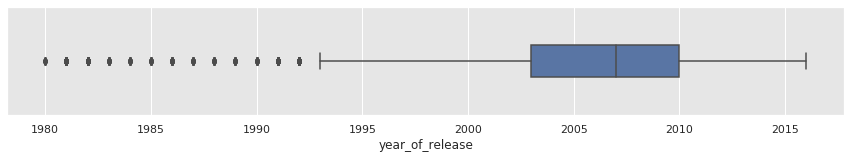

In [21]:
plt.figure(figsize=(15, 2))

sns.boxplot(data=games, x='year_of_release', 
                    orient="h", width=0.3, palette='deep');

Построим распределение игр по годам:

In [22]:
# формируем таблицу с распределением количества игр по годам
number_of_games_per_year = games.pivot_table(index='year_of_release', values='name', aggfunc='count')

# переименовываем столбец
number_of_games_per_year.columns = ['games_per_year']

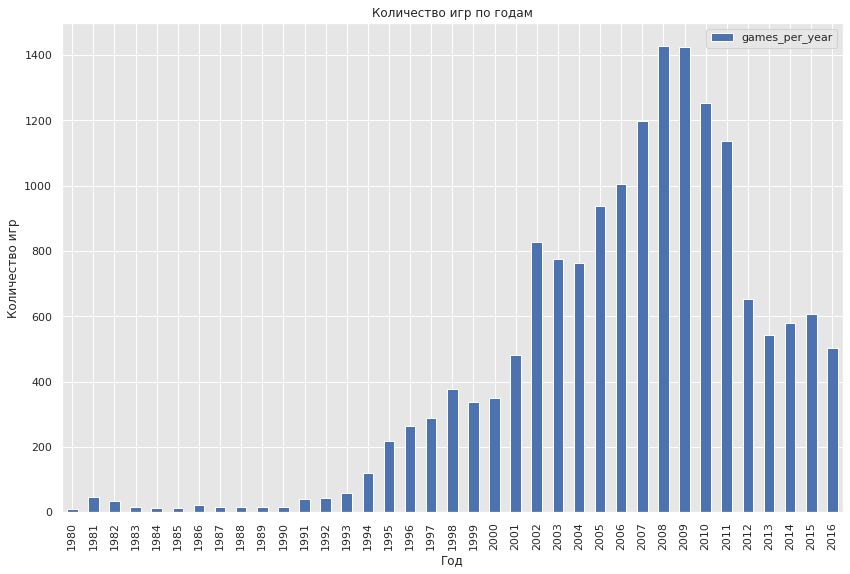

In [23]:
# количество игр по годам
number_of_games_per_year.plot(kind='bar', 
                              y='games_per_year', 
                              figsize=(14, 9), 
                              title='Количество игр по годам')
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.show()

Исходя из диаграммы размаха, все, что было быпущено до 1994 года является выбросами, следовательно, эти данные можно не рассматривать. До 1994 года игр выпускалось меньше 50 в год, затем в 1995 количество игр увеличилось - скорее всего это связано с запуском Playstation 2. Далее количество игр в год плавно увеличивалось, пока в 2002 не произошел скачок.

Исходя из распределения релизов игр по годам, разумно рассматривать период с 2003-2004 годов, когда игры начали набирать популярность - количество игр, выпущенных в эти годы, несоизмеримо больше выпущенных за предыдущие годы.

### Анализ изменения продаж по платформам

Найдем наиболее кассовые платформы для периода с 2004 года.

In [24]:
# ищем популярные игровые платформы младше 2004

find_most_popular = games.query('year_of_release >= 2004').pivot_table(index='platform',
                     values='total_sales', 
                     aggfunc='sum').sort_values('total_sales', ascending=False).head(10)

In [25]:
find_most_popular

,total_sales
platform,
X360,961.24
PS3,931.34
Wii,891.18
DS,802.76
PS2,638.27
PS4,314.14
PSP,289.53
3DS,257.81
PC,178.18


Исключим из списка PS2, так как данная платформа в 2004 году уже является устаревшей и теряет популярность, и PC, так как для анализа характерного срока появления и падения популярности платформы данная платформа не показательна - интерес к ПК сохраняется на всем протяжении практически на одном уровне - почти каждую игру портируют на ПК. Предпосылок к снижению интереса к играм на ПК нет. 

In [26]:
# исключаем PS2 и PC
find_most_popular = (
    find_most_popular.query('@find_most_popular.index != "PS2" and @find_most_popular.index != "PC"')
)

In [27]:
# делаем сводную таблицу продаж на выбранных платформах по годам
most_popular_platforms_per_year = (
    games.query('platform in @find_most_popular.index and year_of_release > 2003')
    .pivot_table(index='year_of_release',
                 columns='platform',
                 values='total_sales',
                 aggfunc='sum')
)

Строим график распределения продаж игр на наиболее популярных платформах с 2004 года по годам

In [28]:
# отрисовка графиков распределения продаж игр на наиболее популярных платформах 
    # data - датафрейм для отрисовки
    # figsize - настройка размера
    
def most_popular_plot(data, figsize):
    
    data.plot(
        style='o-', 
        figsize=figsize, 
        title='График распределения продаж игр', 
        alpha=.7)

    plt.xlabel('Год')
    plt.ylabel('Сумма продаж')
    plt.show()

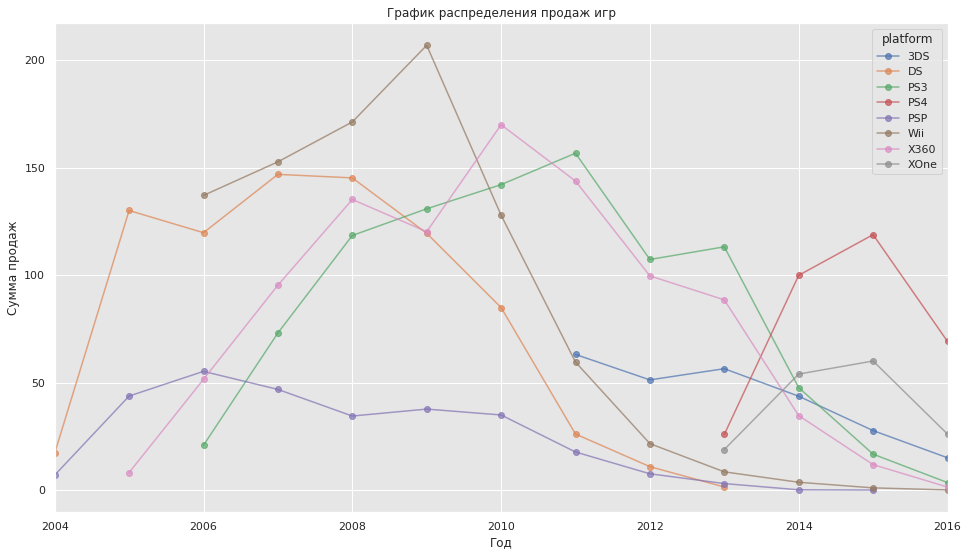

In [29]:
most_popular_plot(most_popular_platforms_per_year, (16, 9))

Наиболее характерный срок жизненного цикла платформы - 7-8 лет. Интерес растет в первые несколько лет (4-5), затем количество продаж уменьшается. Стоит предположить, что это связано с анонсом нового поколения игровых платформ. Данные за 2016 год неполные, этим можно объяснить падение в районе 2016.

Из построенного графика распределения платформ по годам следует, что отсчет текущего поколения платформ был начат в 2013 году, со стартом продаж PS4 и Xbox One. 

Однако, в 2011 году стартовала платформа 3DS, срок жизни которой еще 3-4 года, а динамику после 2015 предсказать нельзя. К тому же, платформы Nintendo популярны в азиатских странах, поэтому стоит включить в __актуальный период__ диапазон с 2011 г по текущее время. Так как данные за 2016 год могут быть неполными, установим верхнюю границу актуального периода - __2015 год__.

### Анализ актуального периода

Пересоберем платформы для актуального периода.

Исключим из полученного набора устаревшие платформы (DS, PS3, Wii, X360, PSP, PS2) так как с выходом нового поколения платформ они потеряли актуальность и уже не интересны для планирования продаж

In [30]:
# список устаревших платформ
list_of_old_platforms = ['DS', 'PS3', 'Wii', 'X360', 'PSP', 'PS2']

In [31]:
# формируем выборку актуальных платформ
actual_period_platforms = (
    games.query('2011 <= year_of_release <= 2015 and platform not in @list_of_old_platforms')
)

Построим график распределения продаж игр платформ из актуального периода (2011 - 2015 гг)

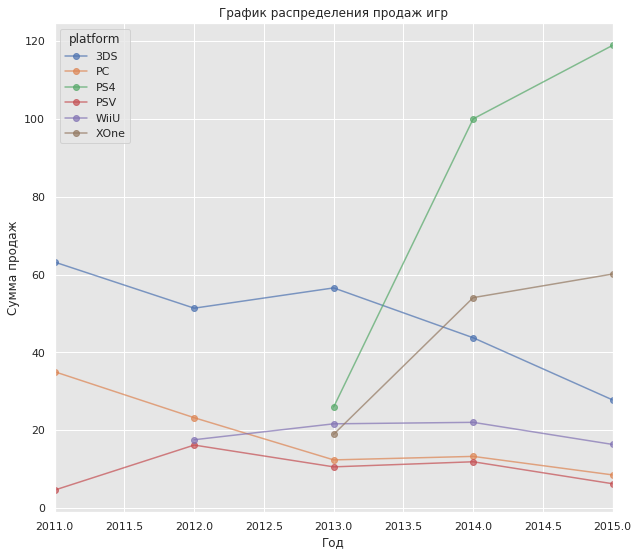

In [32]:
# строим график
most_popular_plot(actual_period_platforms.pivot_table(index='year_of_release',
                                                      columns='platform',
                                                      values='total_sales',
                                                      aggfunc='sum'), 
                  (10, 9))

Продажи игр на __PS4__ и __XOne__ идут вверх - эти платформы запустились в 2013 году, продажи стабильно растут, рост (исходя из опыта платформ предыдущего поколения) будет наблюдаться еще 3-4 года. __PS4__ - лидер продаж

Продажи __3DS__ падают, скорре всего скоро будет анонс платформы нового поколения, однако на текущий момент платформа еще актуальна и выход именитого тайтла может замедлить падение продаж.

Продажи __PSV__ находятся примерно на одном уровне на протяжении всего рассматриваемого периода, также как и __WiiU__.

__PC__ показывает падение продаж к выходу PS4 и XOne, однако затем падение прекратилось и в периоде 2013 - 2015 продажи находятся примерно на одном уровне.

На данный момент потенциально прибыльными платформами являются PS4 и XOne. WiiU также может показать прибыль, при условии выхода популярных игр.

### «Ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам

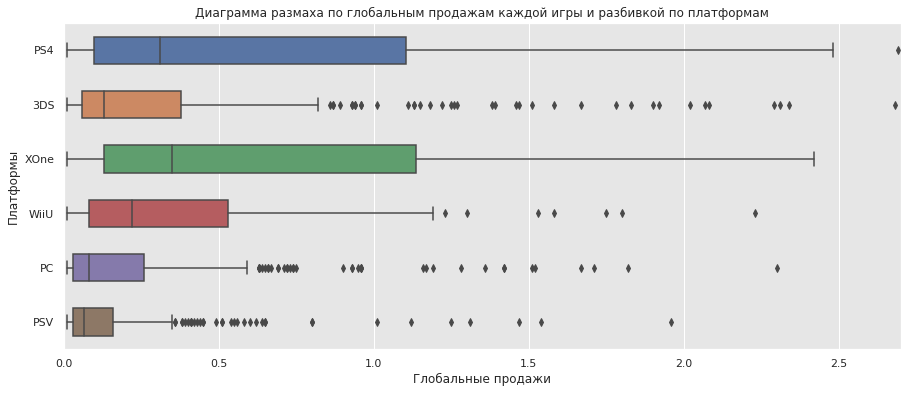

In [33]:
# размеры графика
plt.figure(figsize=(15, 6))

# ограничение оси X
plt.xlim(0, 2.7)

#график
ax = sns.boxplot(data=actual_period_platforms, 
                 x='total_sales', 
                 y='platform', 
                 width=.5)

# устанавливаем названия осей и подпись графика
ax.set(xlabel='Глобальные продажи', 
       ylabel='Платформы', 
       title='Диаграмма размаха по глобальным продажам каждой игры и разбивкой по платформам');

Описание параметров распределения продаж по платформам:

In [34]:
actual_period_platforms.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,466.0,0.520751,1.473436,0.01,0.0600,0.130,0.3775,14.60
PC,335.0,0.275910,0.538250,0.01,0.0300,0.080,0.2600,5.14
PS4,228.0,1.074079,1.899788,0.01,0.0975,0.310,1.1050,14.63
PSV,344.0,0.144070,0.231794,0.01,0.0300,0.065,0.1600,1.96
WiiU,133.0,0.583383,1.105384,0.01,0.0800,0.220,0.5300,7.09
XOne,160.0,0.832313,1.182243,0.01,0.1300,0.350,1.1375,7.39


Максимальное количество игр продано на платформе __3DS__ (466), затем идет __PSV__ (344), потом __PC__ (335).

Меньше всего на текущий момент продано игр на __XOne__ (160) и  __WiiU__ (130).


Максимальные суммы продажи зафиксированы у игр на __PS4__ (14,63 млн) и __3DS__ (14,60 млн).

Средняя сумма продажи игр у __PS4__ (1,07 млн), затем __XOne__ (0,83 млн).

In [35]:
# функция сортировки по столбцу
    # by - параметр для сортировки

def sort_described_platforms(by):
    return (
        actual_period_platforms.groupby('platform')['total_sales']
            .describe()
            .sort_values(by, ascending=False)[by]
    )
    

In [36]:
def draw_barplot(data, xname, yname, title):
    data.plot(kind='bar',
              figsize=(14, 5),
              title=title)
                                
    plt.xlabel(xname)
    plt.ylabel(yname)


Платформы по количеству проданных игр в порядке убывания:

In [37]:
sort_described_platforms('count')

platform
3DS     466.0
PSV     344.0
PC      335.0
PS4     228.0
XOne    160.0
WiiU    133.0
Name: count, dtype: float64

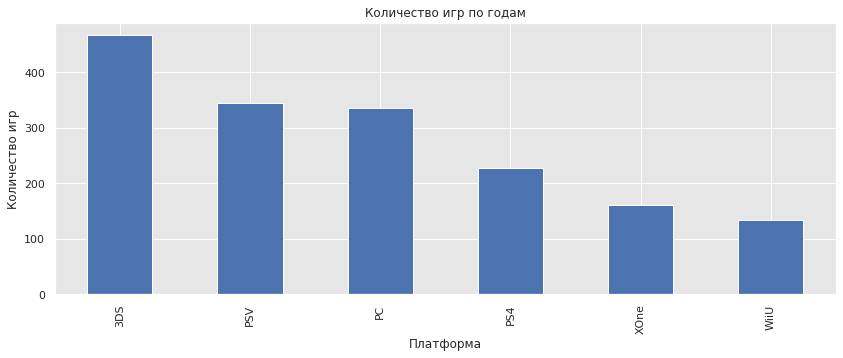

In [38]:
draw_barplot(sort_described_platforms('count'),
             'Платформа', 
             'Количество игр', 
             'Количество игр по годам')

Платформы по размеру средних продаж порядке убывания:

In [39]:
sort_described_platforms('mean')

platform
PS4     1.074079
XOne    0.832313
WiiU    0.583383
3DS     0.520751
PC      0.275910
PSV     0.144070
Name: mean, dtype: float64

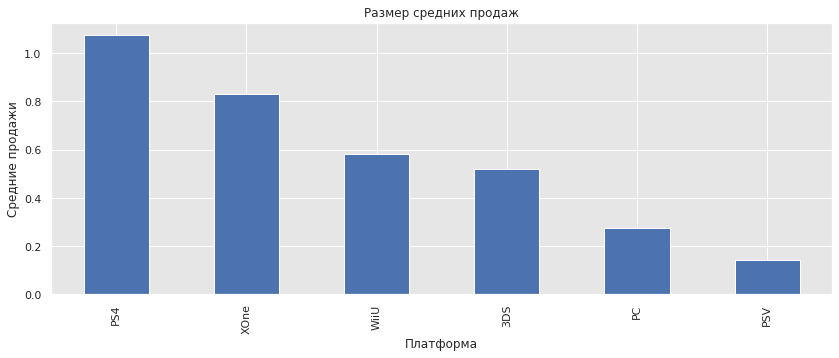

In [40]:
draw_barplot(sort_described_platforms('mean'),
             'Платформа', 
             'Средние продажи', 
             'Размер средних продаж')

Платформы по размеру максимальных продаж порядке убывания:

In [41]:
sort_described_platforms('max')

platform
PS4     14.63
3DS     14.60
XOne     7.39
WiiU     7.09
PC       5.14
PSV      1.96
Name: max, dtype: float64

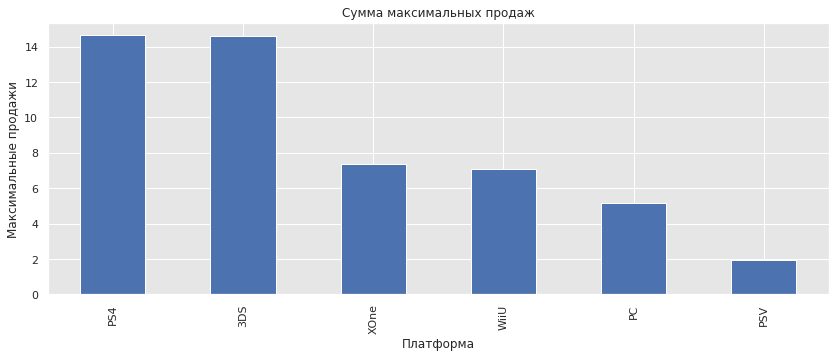

In [42]:
draw_barplot(sort_described_platforms('max'),
             'Платформа', 
             'Максимальные продажи', 
             'Сумма максимальных продаж')

### Анализ влияния на продажи внутри одной популярной платформы отзывов пользователей и критиков

Для рассмотрения выберем платформу с наибольшими средними продажами - __PS4__

In [43]:
ps4 = actual_period_platforms.query('platform == "PS4"')

In [44]:
# функция отрисовки диаграммы рассеяния
    # data - датафрейм
    # xname - ось Х
    # yname - ось Y
    # title - название графика
    # ylim - верхняя граница оси Y

def draw_scatter(data, xname, yname, title, ylim):
  
    data.plot(kind='scatter', 
              x=xname, y=yname, 
              alpha=.3, 
              color='Green', 
              figsize=(10, 6),
              title=title)
    
    plt.ylim(0, ylim)
    plt.xlabel('Рейтинг')     # подпись оси Х
    plt.ylabel('Продажи')    # подпись оси Y

Диаграмма рессеяния для изучения зависимости продаж от оценок критиков:

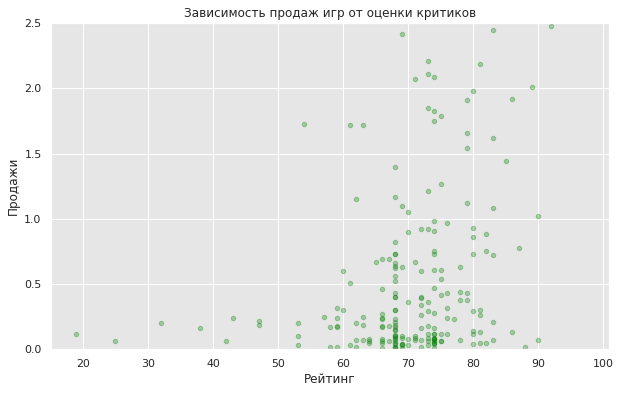

In [45]:
draw_scatter(ps4, 
             'critic_score', 
             'total_sales', 
             'Зависимость продаж игр от оценки критиков', 2.5)

Диаграмма рессеяния для изучения зависимости продаж от оценок пользователей:

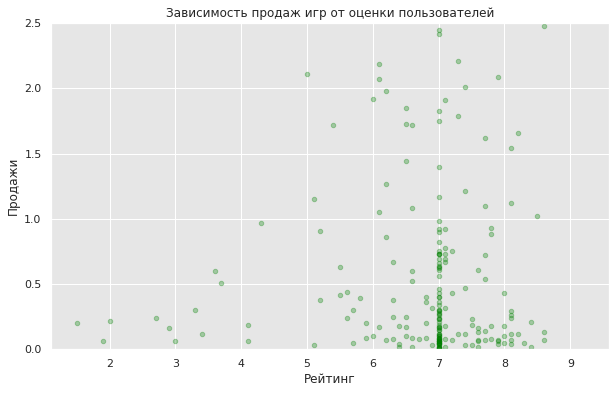

In [46]:
draw_scatter(ps4, 
             'user_score', 
             'total_sales', 
             'Зависимость продаж игр от оценки пользователей', 2.5)

###### Найдем корреляции между отзывами и продажами

In [47]:
ps4[['total_sales', 'critic_score', 'user_score']].corr().head(1)

,total_sales,critic_score,user_score
total_sales,1.0,0.358887,0.006475


Исходя из полученных диаграмм и значений корреляции, можно сделать вывод, что продажи __не зависят__ от оценки пользователей.

Есть небольшая корреляция между продажами и оценкой критиков, однако она не позволяет достоверно утверждать, что данная оценка влияет на продажи. Стоит отметить, что в нашей выборке у игр с рейтингом ниже 55 нет продаж больше 0,4 млн.

### Сопоставление с другими платформами

Диаграмма рессеяния для изучения зависимости продаж от оценок критиков для всех платформ (исключая PS4):

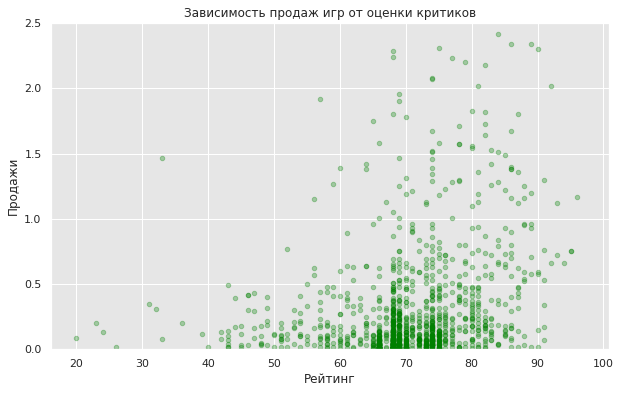

In [48]:
draw_scatter(actual_period_platforms.query('platform != "PS4"'),
             'critic_score', 
             'total_sales', 
             'Зависимость продаж игр от оценки критиков', 2.5)

Диаграмма рессеяния для изучения зависимости продаж от оценок пользователей для всех платформ исключая PS4):

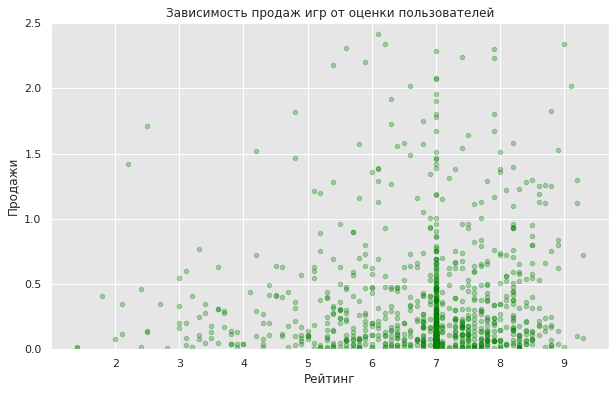

In [49]:
draw_scatter(actual_period_platforms.query('platform != "PS4"'), 
             'user_score', 
             'total_sales', 
             'Зависимость продаж игр от оценки пользователей', 2.5)

Оценим корреляцию:

In [50]:
# корелляция для остальных платформ
actual_period_platforms.query('platform != "PS4"')[['total_sales', 'critic_score', 'user_score']].corr().head(1)

,total_sales,critic_score,user_score
total_sales,1.0,0.250932,0.058766


В целом, зависимости для всех остальных платформ (не включая PS4) сохраняются. Корреляция не позволяет утверждать, что продажи игр значительно зависят от оценок критиков и пользователей. 

Корелляция между продажами и оценками критиков несколько ниже, чем для выборки с PS4. Корреляция между продажами и оценками пользователей выше примерно на 0,04.

### Анализ общего распределения игр по жанрам

Построим график распределения выпущенных игр за актуальный период по жанрам в порядке убывания количества:

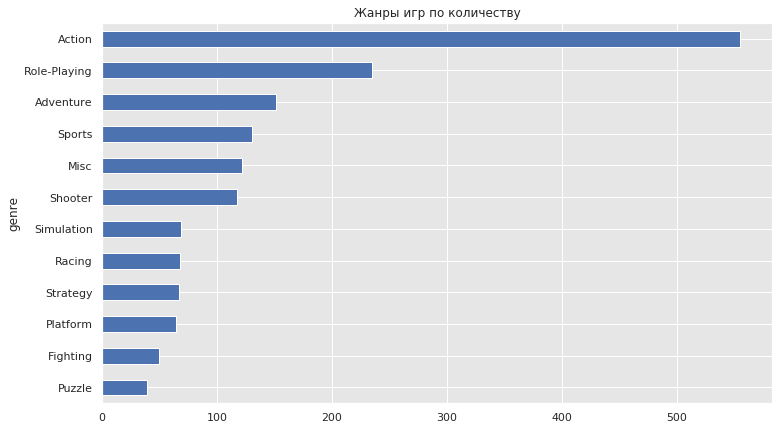

In [51]:
(
    actual_period_platforms.groupby('genre')
        .agg('count')['name']
        .sort_values()
    .plot(kind='barh', y='name', 
          legend=False, figsize=(12, 7),
          title='Жанры игр по количеству')
);

Построим график распределения игр по жанрам за актуальный период в порядке убывания продаж:

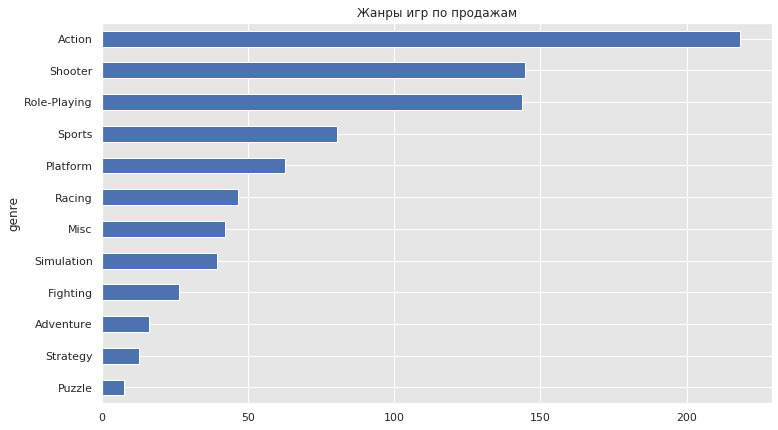

In [52]:
(
    actual_period_platforms.groupby('genre')
        .agg('sum')['total_sales']
        .sort_values()
    .plot(kind='barh', y='total_sales', 
          legend=False, figsize=(12, 7),
          title='Жанры игр по продажам')
);

За рассматриваемый период больше всего выпустили игр жанра __экшн__, затем с большим отставанием идет __РПГ__. Меньше 50 выпустили __паззлов__ и __файтингов__.


По продажам также сильно выделяется __экшн__. За ним примерно равные показатели у __шутеров__ и __РПГ__. Наименьшие продажи у __паззлов__.

### Вывод

До 1994 года игр выпускалось меньше 50 в год, затем в 1995 количество игр увеличилось - скорее всего это связано с запуском Playstation 2. Далее количество игр в год плавно увеличивалось, пока в 2002 не произошел скачок.

Исходя из распределения релизов игр по годам, разумно рассматривать период с 2003-2004 годов, когда игры начали набирать популярность - количество игр, выпущенных в эти годы, несоизмеримо больше выпущенных за предыдущие годы.

Наиболее характерный срок жизненного цикла платформы - 7-8 лет. Интерес растет в первые несколько лет (4-5), затем количество продаж уменьшается. Стоит предположить, что это связано с анонсом нового поколения игровых платформ.

Из построенного графика распределения платформ по годам следует, что отсчет текущего поколения платформ был начат в 2013 году, со стартом продаж PS4 и Xbox One. Однако, в 2011 году стартовала платформа 3DS, срок жизни которой еще 3-4 года, а динамику после 2015 предсказать нельзя. К тому же, платформы Nintendo популярны в азиатских странах, поэтому стоит включить в актуальный период диапазон с 2011 г по текущее время. Так как данные за 2016 год могут быть неполными, установим верхнюю границу актуального периода - 2015 год.

Выбранный __актуальный период__: 2011 - 2015 гг.

Продажи игр на PS4 и XOne стабильно растут, эти платформы запустились в 2013 году, рост (исходя из опыта платформ предыдущего поколения) будет наблюдаться еще 3-4 года. PS4 - лидер продаж

Продажи 3DS падают, скорее всего скоро будет анонс платформы нового поколения, однако на текущий момент платформа еще актуальна и выход именитого тайтла может замедлить падение продаж.

Продажи PSV находятся примерно на одном уровне на протяжении всего рассматриваемого периода, также как и WiiU.

PC показывает падение продаж к выходу PS4 и XOne, однако затем падение прекратилось и в периоде 2013 - 2015 продажи находятся примерно на одном уровне.

На данный момент потенциально прибыльными платформами являются PS4 и XOne. WiiU также может показать прибыль, при условии выхода популярных игр.

В ходе анализа актуального периода установлено:
- Максимальное количество игр продано на платформе 3DS (466), затем идет PSV (344), потом PC (335).

- Меньше всего на текущий момент продано игр на XOne (160) и WiiU (130).

- Максимальные суммы продажи зафиксированы у игр на PS4 (14,63 млн) и 3DS (14,60 млн).

- Средняя сумма продажи игр у PS4 (1,07 млн), затем XOne (0,83 млн).

Для проведения анализа зависимости продаж от оценок критиков и пользователей, была выбрана платформа PS4, как имеющая самые большие средние продажи. Исходя из проведенного анализа диаграмм рассеяний и значений корреляции, можно сделать вывод, что продажи не зависят от оценки пользователей. Есть небольшая корреляция между продажами и оценкой критиков, однако она не позволяет достоверно утверждать, что данная оценка влияет на продажи. Стоит отметить, что в нашей выборке у игр с рейтингом ниже 55 нет продаж больше 0,4 млн.

Тренд на независимость продаж от оценок сохраняется для всех остальных платформ (не включая PS4). Корреляция не позволяет утверждать, что продажи игр значительно зависят от оценок критиков и пользователей.

Корелляция между продажами и оценками критиков несколько ниже, чем для выборки с PS4. Корреляция между продажами и оценками пользователей выше примерно на 0,04.

За рассматриваемый актуальный период больше всего выпустили игр жанра __экшн__ - он также является лидером по продажам, - затем с большим отставанием идет РПГ. Меньше 50 выпустили паззлов и файтингов. Паззлы также выделяются, как самые не продаваемые.

## 4. Портрет пользователя каждого региона

### Анализ для пользователя каждого региона (NA, EU, JP)

#### Самые популярные платформы (топ-5). Различия в долях продаж

Найдем топ-5 платформ:

In [53]:
# функция поиска топ-5 выбранных параметров в регионе и их долей на рынке
    # data - датафрейм
    # region - регион
    # what_to_find - параметр для поиска
            # 'platform' - по платформам
            # 'genre' - по жанру
            # 'rating' - по рейтингу
            
def find_top_per_region(data, region, what_to_find):
    
    if what_to_find == 'platform':
        
        # формируем сводную таблицу с суммарными продажами по платформе в регионе
        temp = data.pivot_table(index='platform',
                                values=region,
                                aggfunc='sum')
    
        # ищем сумму всех продаж
        temp_sum_sales = temp[region].sum()
    
        # ищем долю каждой платформы
        temp['part'] = temp[region] / temp_sum_sales
    
        return temp.sort_values(region, ascending=False).head()

    elif what_to_find == 'genre':
        
        # формируем сводную таблицу с популярными жанрами в регионе
        temp = data.pivot_table(index='genre',
                                values=region,
                                aggfunc='sum')
    
        # ищем сумму всех продаж
        temp_sum_sales = temp[region].sum()
    
        # ищем долю каждой платформы
        temp['part'] = temp[region] / temp_sum_sales
    
        return temp.sort_values(region, ascending=False).head()
    
    else:
        
        # формируем сводную таблицу со средними продажами игр по рейтингу
        return data.pivot_table(index='rating',
                                values=region,
                                aggfunc='mean').sort_values(region, ascending=False)

In [54]:
# функция отрисовки pie-chart
    # data - датафрейм
    # title - название

def draw_pie(data, title):
    data.plot(kind='pie', y='part', 
              title=title, figsize=(7, 7));

- Регион Северная Америка (NA)

In [55]:
na = find_top_per_region(actual_period_platforms, 'na_sales', 'platform')

Топ-5 платформ для региона Северная Америка:

In [56]:
na

,na_sales,part
platform,,
PS4,87.25,0.271426
XOne,78.85,0.245295
3DS,78.51,0.244237
WiiU,36.00,0.111993
PC,28.52,0.088723


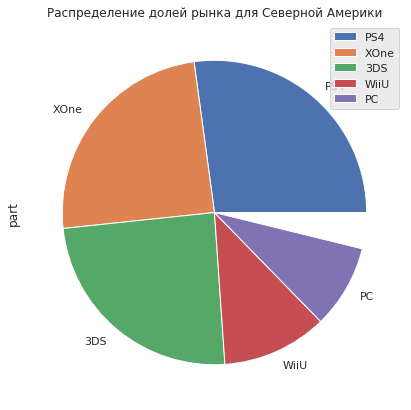

In [57]:
draw_pie(na, 'Распределение долей рынка для Северной Америки')

- Регион Европа (EU)

In [58]:
eu = find_top_per_region(actual_period_platforms, 'eu_sales', 'platform')

Топ-5 платформ для региона Европа:

In [59]:
eu

,eu_sales,part
platform,,
PS4,109.31,0.364719
3DS,58.94,0.196657
PC,53.17,0.177405
XOne,41.96,0.140002
WiiU,23.65,0.078910


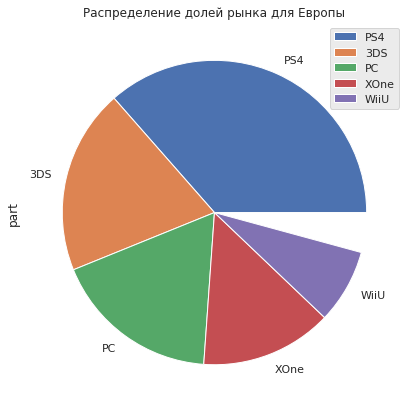

In [60]:
draw_pie(eu, 'Распределение долей рынка для Европы')

- Регион Япония (JP)

In [61]:
jp = find_top_per_region(actual_period_platforms, 'jp_sales', 'platform')

Топ-5 платформ для региона Япония:

In [62]:
jp

,jp_sales,part
platform,,
3DS,92.59,0.692210
PSV,18.28,0.136663
WiiU,12.34,0.092255
PS4,10.22,0.076406
XOne,0.33,0.002467


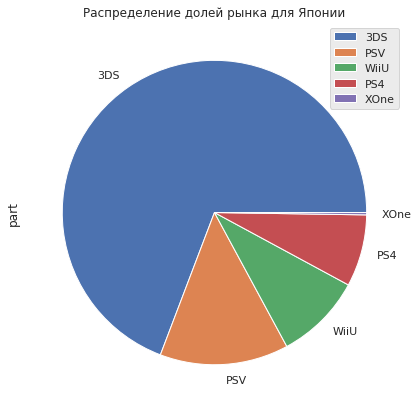

In [63]:
draw_pie(jp, 'Распределение долей рынка для Японии')

__Наблюдаются большие различия в долях продаж от рынка к рынку:__
- _Северная Америка:_

  Лидер в регионе - PS4 (доля - 27.14% от всего рынка продаж), примерно одинаковые доли продаж приходятся XOne и 3DS (24.53% и 24.42% соответственно), затем WiiU (11.2%) и PC (9.9%). Остальное приходится на платформу PSV
  
  
- _Европа:_

  Здесь первое место занимает так же PS4 (доля рынка 36.47%), затем с примерно равным отрывом друг от друга - 3DS (19.67%), PC (17.74%) и XOne (14%). Последнее место в топ-5 занимает WiiU	(7,9%)
  
  
- _Япония:_

  Огромный отрыв у 3DS (69.22% рынка региона), затем PSV (13.67%), далее - WiiU	и PS4 (9.2% и 7.6% соответственно). Последнее место в топ-5 по региону занимает XOne (0.2%). __NB:__ Стоит отметить популярность портативных приставок.

#### Самые популярные жанры (топ-5)

- Регион Северная Америка (NA)

In [64]:
na_genre = find_top_per_region(actual_period_platforms, 'na_sales', 'genre')

Топ-5 жанров для региона Северная Америка:

In [65]:
na_genre

,na_sales,part
genre,,
Action,84.68,0.263431
Shooter,65.61,0.204106
Role-Playing,46.13,0.143506
Sports,33.10,0.102971
Platform,25.74,0.080075


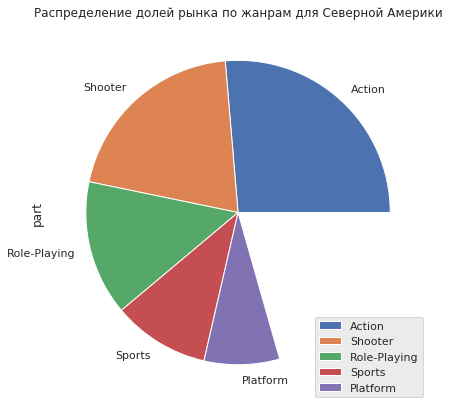

In [66]:
draw_pie(na_genre, 'Распределение долей рынка по жанрам для Северной Америки')

- Регион Европа (EU)

In [67]:
eu_genre = find_top_per_region(actual_period_platforms, 'eu_sales', 'genre')

Топ-5 жанров для региона Европа:

In [68]:
eu_genre

,eu_sales,part
genre,,
Action,80.00,0.266925
Shooter,57.05,0.190351
Role-Playing,38.64,0.128925
Sports,32.84,0.109573
Platform,21.03,0.070168


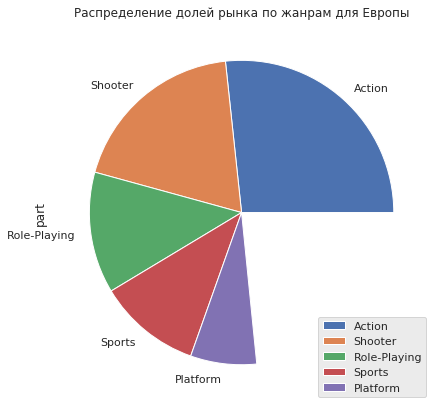

In [69]:
draw_pie(eu_genre, 'Распределение долей рынка по жанрам для Европы')

- Регион Япония (JP)

In [70]:
jp_genre = find_top_per_region(actual_period_platforms, 'jp_sales', 'genre')

Топ-5 жанров для региона Япония:

In [71]:
jp_genre

,jp_sales,part
genre,,
Role-Playing,48.00,0.358852
Action,29.77,0.222563
Platform,10.60,0.079246
Simulation,10.31,0.077078
Misc,9.83,0.073490


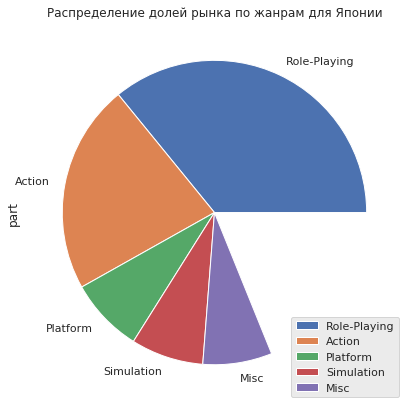

In [72]:
draw_pie(jp_genre, 'Распределение долей рынка по жанрам для Японии')

__Доли жанров из топ-5 наиболее популярных в отдельно взятом регионе для Северной Америки и Европы практически идентичны:__
- _Северная Америка:_
    - Action - 26.34%
    - Shooter - 20.41%
    - Role-Playing - 14.35%
    - Sports - 10.3%
    - Platform - 8%


- _Европа:_
    - Action - 26.69%
    - Shooter - 19.04%
    - Role-Playing - 12.89%
    - Sports - 10.96%
    - Platform - 7%

  
  Лидеры в обоих регионах - экшн, на последнем месте из топ-5 - платформеры
  
  
- _Япония:_

  Здесь доминирует Role-Playing (35.89%), на втором месте Action (22.26%), далее примерно равные доли у Platform, Simulation и Misc (7.9%, 7.7% и 7.3% соответственно)

#### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [73]:
# формируем сводную таблице, считаем средние продажи для возрастного рейтинга в каждом регионе
esrb = find_top_per_region(actual_period_platforms, 
                           ['na_sales', 'eu_sales', 'jp_sales'], 
                           'raiting')[['na_sales', 'eu_sales', 'jp_sales']]
esrb.columns = ['north_america', 'europe', 'japan']

In [74]:
esrb

,north_america,europe,japan
rating,,,
M,0.415515,0.407978,0.032206
E10+,0.205941,0.151436,0.038960
E,0.168981,0.177154,0.088000
T,0.117675,0.098361,0.106364
RP,0.000000,0.030000,0.000000


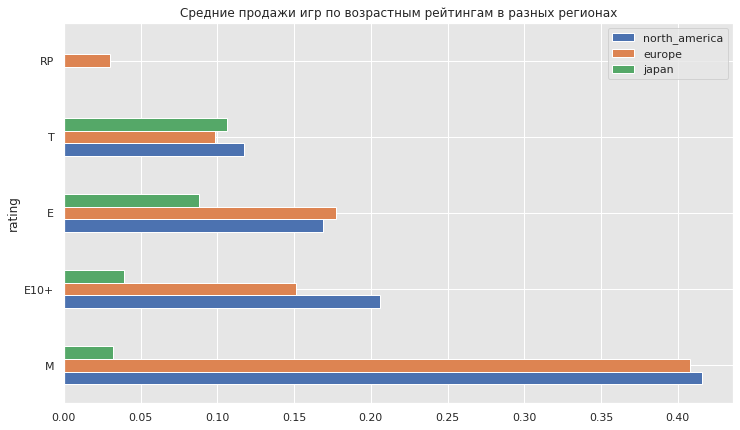

In [75]:
esrb.plot(kind='barh',figsize=(12, 7),
          title='Средние продажи игр по возрастным рейтингам в разных регионах');

В Северной Америке и Европе преобладают продажи игр категории __M__ (для людей старше 17 лет). Наименее популярны игры категории __T__ (возраст 13+). В Японии же наоборот наиболее популярны игры категории __T__, тогда как игры для взрослых (__M__) находятся внизу рейтинга.

Скорее всего, влияет не возрастной рейтинг, а популярный в регионе жанр. Экшн и шутерам с большей вероятностью будет присвоена категория 17+ (см. топ-5 популярных жанров в Северной Америке и Европе), чем РПГ (наиболее популярному жанру в Японии)

### Выводы

__Проанализировали различия в долях продаж пётоп-5 платформ на рынках Северной Америки, Европы и Японии:__
- _Северная Америка:_

  Лидер в регионе - PS4 (доля - 27.14% от всего рынка продаж), примерно одинаковые доли продаж приходятся XOne и 3DS (24.53% и 24.42% соответственно), затем WiiU (11.2%) и PC (9.9%). Остальное приходится на платформу PSV
  
  
- _Европа:_

  Здесь первое место занимает так же PS4 (доля рынка 36.47%), затем с примерно равным отрывом друг от друга - 3DS (19.67%), PC (17.74%) и XOne (14%). Последнее место в топ-5 занимает WiiU	(7,9%)
  
  
- _Япония:_

  Огромный отрыв у 3DS (69.22% рынка региона), затем PSV (13.67%), далее - WiiU	и PS4 (9.2% и 7.6% соответственно). Последнее место в топ-5 по региону занимает XOne (0.2%). __NB:__ Стоит отметить популярность портативных приставок.
  
  
Имеются большие различия в популярности платформ в разных регионах, которые следует учитывать при планировании продаж и рекламных кампаний.

__Доли жанров из топ-5 наиболее популярных в отдельно взятом регионе для Северной Америки и Европы практически идентичны:__
- _Северная Америка:_
    - Action - 26.34%
    - Shooter - 20.41%
    - Role-Playing - 14.35%
    - Sports - 10.3%
    - Platform - 8%


- _Европа:_
    - Action - 26.69%
    - Shooter - 19.04%
    - Role-Playing - 12.89%
    - Sports - 10.96%
    - Platform - 7%

  
  Лидеры в обоих регионах - экшн, на последнем месте из топ-5 - платформеры
  
  
- _Япония:_

  Здесь доминирует Role-Playing (35.89%), на втором месте Action (22.26%), далее примерно равные доли у Platform, Simulation и Misc (7.9%, 7.7% и 7.3% соответственно)
  
  
 Различия между Америкой и Европой практически нет, тогда как между этими регионами и Японией имеется разница (например наиболее популярный жанр у японцев - РПГ)

В Северной Америке и Европе преобладают продажи игр категории __M__ (для людей старше 17 лет). Наименее популярны игры категории __T__ (возраст 13+). 

В Японии же наоборот наиболее популярны игры категории __T__, тогда как игры для взрослых (__M__) находятся внизу рейтинга.

Скорее всего, влияет не возрастной рейтинг, а популярный в регионе жанр. Экшн и шутерам с большей вероятностью будет присвоена категория 17+ (см. топ-5 популярных жанров в Северной Америке и Европе), чем РПГ (наиболее популярному жанру в Японии)

## 5. Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Формулируем 2 гипотезы:
- нулевая гипотеза (Н0) - _средние пользовательские рейтинги платформ Xbox One и PC равны_
- альтернативная гипотеза (Н1) - _средние пользовательские рейтинги платформ Xbox One и PC различаются_

Формируем срезы по платформам:

In [76]:
ps4_user_score = ps4['user_score']
xone_user_score = actual_period_platforms.query('platform == "XOne"')['user_score']

In [77]:
print('Средний пользовательский рейтинг платформы PS4:', np.mean(ps4_user_score))
print('Средний пользовательский рейтинг платформы Xbox One:', np.mean(xone_user_score))

Средний пользовательский рейтинг платформы PS4: 6.771929824561403
Средний пользовательский рейтинг платформы Xbox One: 6.621250000000001


Проведем проверку гипотез с помощью Т-теста.

Имеем две генеральные совокупности (Xbox One и PC), поэтому используем метод __scipy.stats.ttest_ind()__.

In [78]:
# устанавливаем значение уровня статистической значимости
alpha = .05 

results = scipy.stats.ttest_ind(ps4_user_score,
                                xone_user_score,
                                equal_var=False)

print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем гипотезу Н0 о равенстве значений: пользовательские рейтинги платформ Xbox One и PC различаются')
    
else:
    print('Отвергнуть гипотезу Н0 не получилось: средние пользовательские рейтинги значимо не различаются')

p-значение:  0.2075143976159592
Отвергнуть гипотезу Н0 не получилось: средние пользовательские рейтинги значимо не различаются


Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

### Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные

Формулируем нулевую гипотезу (Н0), исходя из того, что _средние пользовательские рейтинги жанров Action и Sports равны_.

Тогда альтернативная гипотеза (Н1) - _средние пользовательские рейтинги жанров Action и Sports различаются_

In [79]:
action_user_score = actual_period_platforms.query('genre == "Action"')['user_score']
sports_user_score = actual_period_platforms.query('genre == "Sports"')['user_score']

In [80]:
print('Средний пользовательский рейтинг жанра Action:', np.mean(action_user_score))
print('Средний пользовательский рейтинг жанра Sports:', np.mean(sports_user_score))

Средний пользовательский рейтинг жанра Action: 6.921261261261262
Средний пользовательский рейтинг жанра Sports: 6.001538461538461


Здесь выборки также являются генеральными совокупностями, также используем метод __scipy.stats.ttest_ind()__.

In [81]:
# устанавливаем значение уровня статистической значимости
alpha = .05 

results = scipy.stats.ttest_ind(action_user_score,
                                sports_user_score,
                                equal_var=False)

print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем гипотезу Н0 о равенстве значений: пользовательские рейтинги жанров Action и Sports различаются')
    
else:
    print('Отвергнуть гипотезу Н0 не получилось: средние пользовательские рейтинги значимо не различаются')

p-значение:  1.6647349520198456e-09
Отвергаем гипотезу Н0 о равенстве значений: пользовательские рейтинги жанров Action и Sports различаются


Средние пользовательские рейтинги жанров Action и Sports разные

### Выводы

Было проверено 2 утверждения:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые:
    
    сформулированы гипотезы:
    - __нулевая__ - _средние пользовательские рейтинги платформ Xbox One и PC равны_
    - __альтернативная__ - _средние пользовательские рейтинги платформ Xbox One и PC различаются_
    
  Проведен Т-тест, методом __scipy.stats.ttest_ind()__ для двух генеральных совокупностей (Xbox One и PC). Отвергнуть гипотезу Н0 не получилось: ___средние пользовательские рейтинги значимо не различаются___.
    
    
- Средние пользовательские рейтинги жанров Action и Sports разные:
    
    сформулированы гипотезы:
    - __нулевая__ - _ссредние пользовательские рейтинги жанров Action и Sports равны_
    - __альтернативная__ - _средние пользовательские рейтинги жанров Action и Sports различаются_
    
  Т-тест, проведенный при помощи метода __scipy.stats.ttest_ind()__ для двух генеральных совокупностей (Action и Sports), позволил отвергнуть гипотезу Н0: ___средние пользовательские рейтинги жанров Action и Sports разные___.

## 6. Общий вывод

Полученные данные имели пропуски, названия столбцов включали в себя заглавные буквы и несоответствия типов данных.

Регистр названий столбцов датафрейма изменен методом ___.str.lower()___.

Замены типов данных в столбцах critic_score, user_score была проведена методом ___.astype()___. Текстовые значения ___'tbd'___ в столбце __user_score__ были конвертированы в значения NaN методом ___pd.to_numeric()___. Тип данных столюца year_of_release изменен методом __pd.to_datetime()__ 

Пропуски были обработаны в зависимости от контекста.

Найден наиболее характерный срок жизненного цикла платформы - 7-8 лет. Интерес растет в первые несколько лет (4-5), затем количество продаж уменьшается. Стоит предположить, что это связано с анонсом нового поколения игровых платформ.

Отсчет текущего поколения платформ был начат в 2013 году, со стартом продаж PS4 и Xbox One. Однако, в 2011 году стартовала платформа 3DS, срок жизни которой еще 3-4 года, а динамику после 2015 предсказать нельзя. К тому же, платформы Nintendo популярны в азиатских странах, поэтому включили в актуальный период диапазон с 2011 г по текущее время. Так как данные за 2016 год могут быть неполными, установили верхнюю границу актуального периода - 2015 год.

Выбранный __актуальный период__: 2011 - 2015 гг.

Продажи игр на PS4 и XOne стабильно растут, эти платформы запустились в 2013 году, рост (исходя из опыта платформ предыдущего поколения) будет наблюдаться еще 3-4 года. PS4 - лидер продаж

Продажи 3DS падают, скорее всего скоро будет анонс платформы нового поколения, однако на текущий момент платформа еще актуальна и выход именитого тайтла может замедлить падение продаж.

Продажи PSV находятся примерно на одном уровне на протяжении всего рассматриваемого периода, также как и WiiU.

PC показывает падение продаж к выходу PS4 и XOne, однако затем падение прекратилось и в периоде 2013 - 2015 продажи находятся примерно на одном уровне.

На данный момент потенциально прибыльными платформами являются PS4 и XOne. WiiU также может показать прибыль, при условии выхода популярных игр.

В ходе анализа актуального периода установлено:
- Максимальное количество игр продано на платформе 3DS (466), затем идет PSV (344), потом PC (335).

- Меньше всего на текущий момент продано игр на XOne (160) и WiiU (130).

- Максимальные суммы продажи зафиксированы у игр на PS4 (14,63 млн) и 3DS (14,60 млн).

- Средняя сумма продажи игр у PS4 (1,07 млн), затем XOne (0,83 млн).

Для проведения анализа зависимости продаж от оценок критиков и пользователей, была выбрана платформа PS4, как имеющая самые большие средние продажи. Исходя из проведенного анализа диаграмм рассеяний и значений корреляции, сделан вывод, что продажи не зависят от оценки пользователей. Есть небольшая корреляция между продажами и оценкой критиков, однако она не позволяет достоверно утверждать, что данная оценка влияет на продажи.

Тренд на независимость продаж от оценок сохраняется для всех остальных платформ (не включая PS4). Корреляция не позволяет утверждать, что продажи игр значительно зависят от оценок критиков и пользователей.

Корелляция между продажами и оценками критиков несколько ниже, чем для выборки с PS4. Корреляция между продажами и оценками пользователей выше примерно на 0,04.

За рассматриваемый актуальный период больше всего выпустили игр жанра __экшн__ - он также является лидером по продажам, - затем с большим отставанием идет РПГ. Меньше 50 выпустили паззлов и файтингов. Паззлы также выделяются, как самые не продаваемые.

__Проанализировали различия в долях продаж топ-5 платформ на рынках Северной Америки, Европы и Японии:__
- _Северная Америка:_

  Лидер в регионе - PS4 (доля - 27.14% от всего рынка продаж), примерно одинаковые доли продаж приходятся XOne и 3DS (24.53% и 24.42% соответственно), затем WiiU (11.2%) и PC (9.9%). Остальное приходится на платформу PSV
  
  
- _Европа:_

  Здесь первое место занимает так же PS4 (доля рынка 36.47%), затем с примерно равным отрывом друг от друга - 3DS (19.67%), PC (17.74%) и XOne (14%). Последнее место в топ-5 занимает WiiU	(7,9%)
  
  
- _Япония:_

  Огромный отрыв у 3DS (69.22% рынка региона), затем PSV (13.67%), далее - WiiU	и PS4 (9.2% и 7.6% соответственно). Последнее место в топ-5 по региону занимает XOne (0.2%). __NB:__ Стоит отметить популярность портативных приставок.
  
  
Имеются большие различия в популярности платформ в разных регионах, которые следует учитывать при планировании продаж и рекламных кампаний.

__Доли жанров из топ-5 наиболее популярных в отдельно взятом регионе для Северной Америки и Европы практически идентичны:__
- _Северная Америка:_
    - Action - 26.34%
    - Shooter - 20.41%
    - Role-Playing - 14.35%
    - Sports - 10.3%
    - Platform - 8%


- _Европа:_
    - Action - 26.69%
    - Shooter - 19.04%
    - Role-Playing - 12.89%
    - Sports - 10.96%
    - Platform - 7%

  
  Лидеры в обоих регионах - экшн, на последнем месте из топ-5 - платформеры
  
  
- _Япония:_

  Здесь доминирует Role-Playing (35.89%), на втором месте Action (22.26%), далее примерно равные доли у Platform, Simulation и Misc (7.9%, 7.7% и 7.3% соответственно)
  
  
 Различия между Америкой и Европой практически нет, тогда как между этими регионами и Японией имеется разница (например наиболее популярный жанр у японцев - РПГ)

В Северной Америке и Европе преобладают продажи игр категории __M__ (для людей старше 17 лет). Наименее популярны игры категории __T__ (возраст 13+). 

В Японии же наоборот наиболее популярны игры категории __T__, тогда как игры для взрослых (__M__) находятся внизу рейтинга.

Скорее всего, влияет не возрастной рейтинг, а популярный в регионе жанр. Экшн и шутерам с большей вероятностью будет присвоена категория 17+ (см. топ-5 популярных жанров в Северной Америке и Европе), чем РПГ (наиболее популярному жанру в Японии)

Было выдвинуто 2 предположения, которые были проверены при помощи Т-теста, методом __scipy.stats.ttest_ind()__ для генеральных совокупностей:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые:
    
    сформулированы гипотезы:
    - __нулевая__ - _средние пользовательские рейтинги платформ Xbox One и PC равны_
    - __альтернативная__ - _средние пользовательские рейтинги платформ Xbox One и PC различаются_
    
  В ходе теста отвергнуть гипотезу Н0 не получилось: ___средние пользовательские рейтинги значимо не различаются___.
    
    
- Средние пользовательские рейтинги жанров Action и Sports разные:
    
    сформулированы гипотезы:
    - __нулевая__ - _ссредние пользовательские рейтинги жанров Action и Sports равны_
    - __альтернативная__ - _средние пользовательские рейтинги жанров Action и Sports различаются_
    
  Т-тест позволил отвергнуть гипотезу Н0: ___средние пользовательские рейтинги жанров Action и Sports разные___.